<a href="https://colab.research.google.com/github/jasonhayes1987/MyProjects/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Up until now, we have been predicting the value of a target variable that can take on any real number (referred to as continuous), but what if you wanted to predict the category an input belonged to, or if something was true or false (referred to as discrete values)? This is called 'Classification' and the methods (algorithms) used to solve classification problems are called 'Classifiers', the most common of which is Logistic Regression. 

Logistic regression works much like linear regression in that it takes in (input) datapoints across multiple features and solves for the feature coefficients that produce the correct output (target). The difference between the two is in the targets. Where a linear regression model is trained on continuous data( targets that can be any real number, ie. value, weight, height, etc...), a logistic regression model is trained on discrete data (targets that can only be certain values, ie. 1/0, true/false, A/B/C). This is accomplished by turning each output into a probability, or a probability distribution (vector of probabilities, in the case there are more than two outcomes, ie. dog, fish, cat) that is compared to the true probability/probability distribution (vector of zeros with a one placed at the true outcome).

I will slowly build on how this is accomplished so by the end of this post you will not only know how to do the math, but you will understand *WHY* you are doing it.

We'll start with binary logistic regression, that is, predicting an output with two possible outcomes (true/false, 1/0, yes/no). The data used will be passenger info from the Titanic. The goal is to develop a logistic regression model capable of predicting whether or not a passenger survived. Let's import the data and display it to view what we have to work with.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
import numpy as np
import pandas as pd

In [ ]:
# import Titanic data
data = load_dataset('titanic')

In [ ]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


There are 891 entries across 15 features. The data includes numbers, booleans (true/false), and categories, all of which will need to be cleaned up and transformed into a format that can be fed into our logistic regression model. Since this isn't an exploration of data pre-processing, I won't get into detail on how to do so.  I will, however, provide a brief explanation of how the data was pre-processed and the code was written to do so.

Target = Survived

Features:


*   Sex -> Male (boolean/[0,1], if not male [0], then female) 
*   Age
*   Sibsp (number of siblings and spouses aboard)
*   Parch (number of parents and children aboard)
*   Fare
*   Pclass (passenger ticket class)
*   Embark_Town -> Queenstown | Southampton (boolean, if both 0 then Cherbourg)

Features Dropped:
*   Class (covered by Pclass)
*   Embarked (covered by Embark_Town)
*   Who (covered by Sex)
*   Adult_Male (described by Sex and Age)
*   Deck (not enough data. 203 non-null values = 688 null values)
*   Alive (covered by Survived)
*   Alone (described by Sibsp & Parch)


In [ ]:
# drop pclass, embarked, who, deck, alive, and alone
data = data.drop(columns=['class', 'embarked', 'who', 'adult_male', 'deck', 'alive', 'alone'])

# eliminate 2 null values in embark_town
data.dropna(axis=0, subset=['embark_town'], inplace=True)

# fill N/A's in age with mean age
data['age'].fillna(data['age'].mean().round(decimals=2), inplace=True)

data

,survived,pclass,sex,age,sibsp,parch,fare,embark_town
0,0,3,male,22.00,1,0,7.2500,Southampton
1,1,1,female,38.00,1,0,71.2833,Cherbourg
2,1,3,female,26.00,0,0,7.9250,Southampton
3,1,1,female,35.00,1,0,53.1000,Southampton
4,0,3,male,35.00,0,0,8.0500,Southampton
...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,Southampton
887,1,1,female,19.00,0,0,30.0000,Southampton
888,0,3,female,29.64,1,2,23.4500,Southampton
889,1,1,male,26.00,0,0,30.0000,Cherbourg


In [ ]:
# one-hot encode class and embark-town and drop first
data = pd.get_dummies(data, columns=['sex', 'embark_town'], drop_first=True)
data

,survived,pclass,age,sibsp,parch,fare,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.00,1,0,7.2500,1,0,1
1,1,1,38.00,1,0,71.2833,0,0,0
2,1,3,26.00,0,0,7.9250,0,0,1
3,1,1,35.00,1,0,53.1000,0,0,1
4,0,3,35.00,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00,0,0,13.0000,1,0,1
887,1,1,19.00,0,0,30.0000,0,0,1
888,0,3,29.64,1,2,23.4500,0,0,1
889,1,1,26.00,0,0,30.0000,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 889 non-null    int64  
 1   pclass                   889 non-null    int64  
 2   age                      889 non-null    float64
 3   sibsp                    889 non-null    int64  
 4   parch                    889 non-null    int64  
 5   fare                     889 non-null    float64
 6   sex_male                 889 non-null    uint8  
 7   embark_town_Queenstown   889 non-null    uint8  
 8   embark_town_Southampton  889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


Now that the data is cleaned up and formatted, we can begin building our logistic regression model. 

Much like linear and multiple regression, logistic regression works by fitting a function to the data. The distinction, as stated above, is logistic regression works with probabilities, so the function is 'fit' to the probability of the passenger surviving given the input.  This is easier to comprehend when seen, so I'll use graphs to demonstrate my explanation.

Optimization terminated successfully.
         Current function value: 0.672429
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.627143
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.515041
         Iterations 5


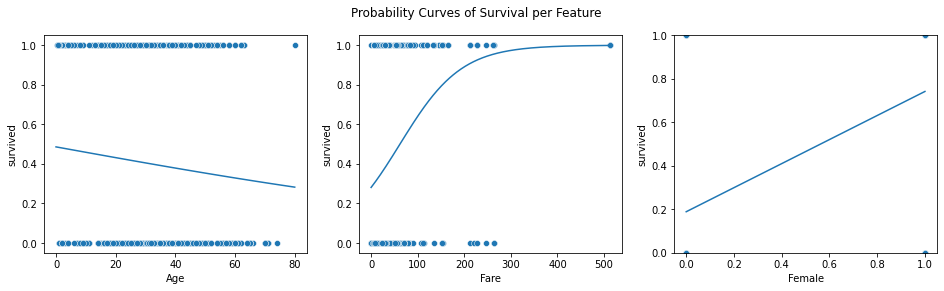

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
 
fig.suptitle('Probability Curves of Survival per Feature')
# age
X = data['age']
Y = data['survived']
null = X.isnull().values
X = X.dropna()
X = np.column_stack((np.ones((X.shape[0],1)),X))
Y = Y.loc[~null]
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
test = np.column_stack((np.ones((81,1)),np.arange(0,81)))
predictions = result.predict(test)
predictions = pd.DataFrame(predictions, columns=['Prob'])

sns.scatterplot(ax=axes[0], x=X[:,1], y=Y)
sns.lineplot(ax=axes[0], x=predictions.index, y=predictions['Prob'])
plt.ylim(bottom=0, top=1)
axes[0].set_xlabel('Age')


# fare
# create x and y variables
X = data['fare']
Y = data['survived']

# get an array of all null values in X
null = X.isnull().values

# drop all null values in X
X = X.dropna()

# add constant to X
X = np.column_stack((np.ones((X.shape[0],1)),X))

# pass inverted null array into Y to keep entries that weren't true (weren't null) 
Y = Y.loc[~null]

logit_model=sm.Logit(Y,X)
result=logit_model.fit()


min = int(data['fare'].min())
max = int(data['fare'].max().round(0))

test = np.column_stack((np.ones((max+1,1)),np.arange(min,max+1)))

# get predictions across the full spectrum of age to plot logistic curve
predictions = result.predict(test)

# turn predictions into dataframe
predictions = pd.DataFrame(predictions, columns=['Prob'])

# plot data
sns.scatterplot(ax=axes[1],x=X[:,1], y=Y)
sns.lineplot(ax=axes[1], x=predictions.index, y=predictions['Prob'])
plt.ylim(bottom=0, top=1)
axes[1].set_xlabel('Fare')


# sex
# create x and y variables
X = data['sex'].replace(to_replace=['male', 'female'], value=[0, 1])
Y = data['survived']

# get an array of all null values in X
null = X.isnull().values

# drop all null values in X
X = X.dropna()

# add constant to X
X = np.column_stack((np.ones((X.shape[0],1)),X))

# pass inverted null array into Y to keep entries that weren't true (weren't null) 
Y = Y.loc[~null]

logit_model=sm.Logit(Y,X)
result=logit_model.fit()


min = int(X.min())
max = int(X.max().round(0))

test = np.column_stack((np.ones((max+1,1)),np.arange(min,max+1)))

# get predictions across the full spectrum of age to plot logistic curve
predictions = result.predict(test)

# turn predictions into dataframe
predictions = pd.DataFrame(predictions, columns=['Prob'])

# plot data
sns.scatterplot(ax=axes[2], x=X[:,1], y=Y)
sns.lineplot(ax=axes[2], x=predictions.index, y=predictions['Prob'])
plt.ylim(bottom=0, top=1)
axes[2].set_xlabel('Female')

plt.show()

The above graphs show datapoints across 3 features and the target (survived), along with the predicted probability curve (also referred to as the sigmoid or s-curve) of surviving. The way the probability curves were calculated was by running a logistic regression on the survived feature (target) using only one other feature variable (Age, Fare, Female) and a bias term. It looks like age had only a minor impact on the chance of survival, decreasing slightly as the passenger increases in age (makes sense). Fare seems to have a major impact on the probability of survival, being almost certain if the fare paid was at or over 200 British Pounds. Since women and children were rescued first, it is logical that being a female increased the probability of survival.

# Probability

I'm sure everyone is familiar with the concept of probability. The probability of something occurring is the ratio of an outcome over the total number of outcomes or number of true results over the number of true and false results:

$prob=\frac{\text{num true}}{\text{num true}+\text{num false}}$

This is the common method for calculating probability, but there is another that uses the concept of 'odds'.

# Odds

Odds differ from probability in that odds is the ratio of the number of true results to the number of false results:

$
\begin{align}
odds&=\frac{\text{num true}}{\text{num false}} \\
\end{align}
$

This is how many more times likely 'X' is compared to 'Y' (true/false). A value of 1 is 'even odds' (50% probability of occurring). Any value between 0 and 1 is considered unfavorable odds (probability < 50%) and values above 1 are considered favorable (probability > 50%). From this we are able to determine the probability using the equation below:

$
\begin{align}
prob&=\frac{odds}{1+odds}
\end{align}
$

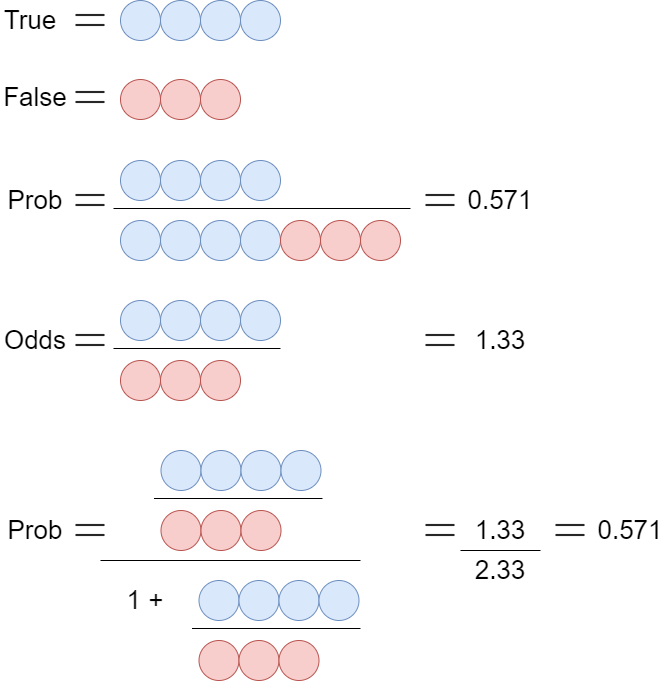

Lets turn these equations into code:

In [ ]:
def odds(true, false):
    return true/false

def prob(odds):
    return odds/(1+odds)

In [ ]:
o = odds(4,3)
print(f'odds={o}')
p = prob(o)
print(f'prob={p}')

odds=1.3333333333333333
prob=0.5714285714285715


The issue with odds is their relative scale (favorable/unfavorable odds ratio) isn't linear, meaning their distances from even odds (50% probability) are different.

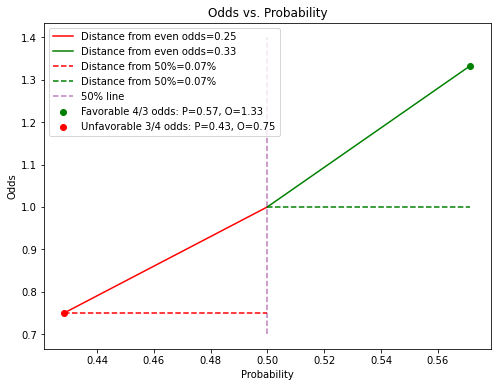

In [ ]:
unfav_o = odds(3,4)
unfav_p = prob(unfav_o)

# create a graph showing favorable/unfavorable odds over probability
os = [o,unfav_o]
ps = [p,unfav_p]

fig = plt.figure(figsize=(8,6))
# plot probability(x)/odds(y) datapoints
plt.scatter(x=ps[0], y=os[0], label=f'Favorable 4/3 odds: P={round(p,2)}, O={round(o,2)}', c='g')
plt.scatter(x=ps[1], y=os[1], label=f'Unfavorable 3/4 odds: P={round(unfav_p,2)}, O={round(unfav_o,2)}', c='r')
# plot distance to even odds lines
plt.plot([ps[1],0.5], [os[1],1], c='r', label=f'Distance from even odds={1-round(os[1],2)}')
plt.plot([0.5,ps[0]], [1,os[0]], c='g', label=f'Distance from even odds={round(os[0]-1,2)}')
# plot distance to 50% probability lines
plt.plot([ps[1],0.5], [os[1],os[1]], c='r', ls='--', label=f'Distance from 50%={.5-round(ps[1],2)}%')
plt.plot([0.5,ps[0]], [1,1], c='g', ls='--', label=f'Distance from 50%={round(ps[0]-.5,2)}%')
prob50 = [0.5,0.5]
odds50 = [0.7,1.4]
plt.plot(prob50, odds50, '--', c='purple', label='50% line', alpha=0.5)
plt.legend(loc='upper left')
plt.title('Odds vs. Probability')
plt.xlabel('Probability')
plt.ylabel('Odds')
plt.show()

Check out the graph above. The datapoints plotted are odds and probability scores of 4/3 and it's opposite (reciprocal) 3/4. I say the opposite because flipping the number transforms the ratio and therefore the value to the odds of failure (false/true). The ratio true/false is marked as 'Favorable' on the graph, whereas false/true is marked 'Unfavorable'.

The 'Favorable' probability was 57%, which means the 'Unfavorable' must be 43%. Both are 7% away from the center (50%), which makes sense. As one side gains, the other side has to lose the same amount because they both make up the whole. What about the odds? The 'Favorable' odds came in at 1.33, 0.33 from 1 (even odds, 1/1). The 'Unfavorable' scored at 0.75, only 0.25 away from 1. They are each other's opposites, but one is further away from even odds (1/1, 50%) than the other. 

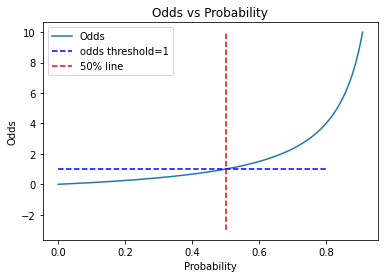

In [ ]:
# show odds to probability graph

os = np.arange(0,10.1,0.1).round(1)

ps = [prob(o) for o in os]

sns.lineplot(x=ps, y=os, label='Odds')
# sns.lineplot(x=ps, y=np.log(os), label='Log-Odds')
prob_range = np.arange(0,1,0.2)
odds_y = np.ones(5)
sns.lineplot(x=prob_range, y=odds_y, color='blue', ls='--', label='odds threshold=1')
# log_odds_y = np.zeros(5)
# sns.lineplot(x=prob_range, y=log_odds_y, color='orange', ls='--', label='log-odds threshold')
prob50 = np.zeros(14) + 0.5
odds50 = np.arange(-3,11)
plt.plot(prob50, odds50, 'r--', label='50% line')
plt.title('Odds vs Probability')
plt.xlabel('Probability')
plt.ylabel('Odds')
plt.legend()
plt.show()

Take a look at how the odds change over the probability. It grows exponentially, squashing all negative outcomes between 0 and 1, and then positive continues from 1 to infinity. This unevenness creates a skewed scale and makes it very difficult to compare values. What we need is a way to turn the odds into a metric that grows linearly (straight line).

# Log Odds

In order to transform exponential growth into something that scales linearly, we need to identify the exponent driving the growth and remove it, essentially reversing the exponentiation. That is exactly the purpose of Logarithms.


To remove the exponential growth from odds in order to put them on a linear scale, we are going to take the natural logarithm (base *e*) of the odds:

$
\begin{align}
log_n(x)&=y \\
n^y&=x \\
\sqrt[y]{x}&=n
\end{align}
$

In [ ]:
import math
x=9 
n=3 # base
y=math.log(x,n) # exponent
print(f'log_{n}({x}) = {y} = y')
print(f'{n}^{y} = {n**y} = x')
print(f'yth root of x = {np.power(x, 1/y)} = n')

log_3(9) = 2.0 = y
3^2.0 = 9.0 = x
yth root of x = 3.0 = n


"*The number e, also known as Euler's number, is a mathematical constant approximately equal to 2.71828 that can be characterized in many ways. It is the base of the natural logarithms. It is the limit of (1 + 1/n)n as n approaches infinity, an expression that arises in the study of compound interest.*" [wiki](https://en.wikipedia.org/wiki/E_(mathematical_constant))

$
\begin{align}
&e=\text{Euler's number} \\
&ln=log_{e}=\text{natural log} \\
&ln(e^{x})=x \\
&odds=\frac{p}{1-p} \\
&ln(odds)=ln(\frac{p}{1-p})
\end{align}
$

Turn the equation into code:

In [ ]:
def log_odds(p):
    return np.log(p/(1-p))

Now we'll turn the odds in the graph above into log odds by running the probabilites array (ps) through our new log_odds function above and then add the results to the plot.

<ipython-input-129-cc66b76000b8>:2: RuntimeWarning: divide by zero encountered in log
  return np.log(p/(1-p))


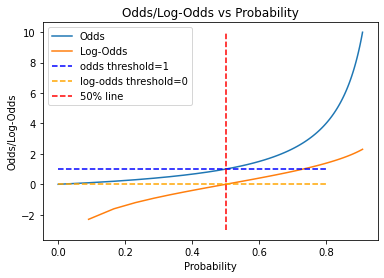

In [ ]:
sns.lineplot(x=ps, y=os, label='Odds')
sns.lineplot(x=ps, y=[log_odds(p) for p in ps], label='Log-Odds')
prob_range = np.arange(0,1,0.2)
odds_y = np.ones(5)
sns.lineplot(x=prob_range, y=odds_y, color='blue', ls='--', label='odds threshold=1')
log_odds_y = np.zeros(5)
sns.lineplot(x=prob_range, y=log_odds_y, color='orange', ls='--', label='log-odds threshold=0')
prob50 = np.zeros(14) + 0.5
odds50 = np.arange(-3,11)
plt.plot(prob50, odds50, 'r--', label='50% line')
plt.title('Odds/Log-Odds vs Probability')
plt.xlabel('Probability')
plt.ylabel('Odds/Log-Odds')
plt.legend()
plt.show()

The log-odds line is flat, showing linear growth! What happens if we use our example from above (4/3 & 3/4 odds) and graph the log odds?

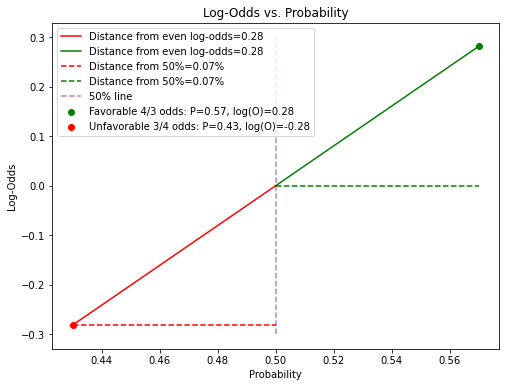

In [ ]:
# create a graph showing favorable/unfavorable log-odds over probability
ps = [0.57,0.43]
log_os = [log_odds(p) for p in ps]


fig = plt.figure(figsize=(8,6))
# plot probability(x)/odds(y) datapoints
plt.scatter(x=ps[0], y=log_os[0], label=f'Favorable 4/3 odds: P={round(ps[0],2)}, log(O)={round(log_os[0],2)}', c='g')
plt.scatter(x=ps[1], y=log_os[1], label=f'Unfavorable 3/4 odds: P={round(ps[1],2)}, log(O)={round(log_os[1],2)}', c='r')
# plot distance to even odds lines
plt.plot([ps[1],0.5], [log_os[1],0], c='r', label=f'Distance from even log-odds={0-round(log_os[1],2)}')
plt.plot([0.5,ps[0]], [0,log_os[0]], c='g', label=f'Distance from even log-odds={round(log_os[0],2)}')
# plot distance to 50% probability lines
plt.plot([ps[1],0.5], [log_os[1],log_os[1]], c='r', ls='--', label=f'Distance from 50%={.5-round(ps[1],2)}%')
plt.plot([0.5,ps[0]], [0,0], c='g', ls='--', label=f'Distance from 50%={round(ps[0]-.5,2)}%')
prob50 = [0.5,0.5]
odds50 = [-0.3,0.3]
plt.plot(prob50, odds50, '--', c='purple', label='50% line', alpha=0.5)
plt.legend(loc='upper left')
plt.title('Log-Odds vs. Probability')
plt.xlabel('Probability')
plt.ylabel('Log-Odds')
plt.show()

The favorable and unfavorable log odds are equidistant from the center (even odds, 50%). Now that the scale is linear, we can easily compare values and determine how close a value is to the target. What can we use to predict linear data? Linear Regression! Remember this, as it was a look under the hood of what we will be predicting and is crucial to understanding the math of logistic regression.

# Logistic Function

When building any model, you have to have a well-defined goal.  Ours is to be able to accurately predict if someone survived the Titanic wreck. The target (survived) is binary, a boolean encoded as 1's and 0's (think of them as 100% & 0% probabilities), which is called a Bernoulli distribution. We want the model to steer itself towards the 1's (100%) (steer towards predicting survived accurately). If the model predicts all the 1's (and 0's by default) correctly, its accuracy will be 100%. This means we want the predictions of passengers who survived to be as close to 100% (1) as possible, so we need a way to turn the output of the model into a probability.

We have gone over two equations that can calculate probability:

$prob=\frac{\text{num true}}{\text{num true}+\text{num false}}$

$
\begin{align}
prob&=\frac{odds}{1+odds}
\end{align}
$

The first equation does us no good. It requires the total number of true over the total number of samples.  The second, though, requires the odds, a ratio that can be expressed as a number (3/4 = 0.75). If we could get our model to predict the odds of each input, the predicted odds could be fed through this probability equation to calculate a predicted probability. 

$prob=\frac{odds}{1+odds}=\frac{\hat{Y}}{1+\hat{Y}}=?$

How can we predict the odds? Recall the odds are just a continuous number from zero to infinity. We learned over the previous posts how to make predictions on continuous data. Isn't that what regression does?

Regression can certainly predict continuous data, but we will run into an issue if the model is trained to predict the odds. Check out the Odds/Log-Odds vs. Probability chart above again. The odds grow exponentially, and our regression model requires linearly scaled data in order to accurately converge to a minimum error (data on a linear scale can be compared easily). This is why you were introduced to the concept of log odds. Training the model to the log of the odds makes it possible to use linear regression to converge to a minimum. 

$
\begin{align}
X &= \text{training data} \\
\theta &= \text{coefficients} \\
X\theta&=log(odds)
\end{align}
$

The probability equation is expressed in terms of odds. We have to reverse (invert) the predicted log odds to the scale of odds. What's the inverse of a logarithm? Exponentiation! For mathematical ease, Euler's number is used as the base (Euler's number plays very well with derivatives).

$
\begin{align}
X &= \text{training data} \\
\theta &= \text{coefficients} \\
log_e&=ln=\text{natural log} \\
X\theta&=log_e(odds) \\
\\
p&=\text{probability} \\
&=\frac{odds}{1+odds} \\
&=\frac{e^{log_e(odds)}}{1+e^{log_e(odds)}} \\
&=\frac{e^{X\theta}}{1+e^{X\theta}}
\end{align}
$

This can be simplified to save on calculation:

$
\begin{align}
p&=\frac{e^{X\theta}}{1+e^{X\theta}} \\
&=\frac{e^{X\theta}}{1+e^{X\theta}} \times \frac{\frac{1}{e^{X\theta}}}{\frac{1}{e^{X\theta}}} \\
&=\frac{1}{\frac{1}{e^{X\theta}}+1} \\
&=\frac{1}{1+\frac{1}{e^{X\theta}}} \\
p&=\frac{1}{1+e^{-X\theta}}
\end{align}
$

You just solved for what's called the 'Logistic Function' or 'Sigmoid'. By using this function, we can transform the output of a linear regression model into probabilities. Let's turn the equation above into a function.

In [ ]:
def logistic_func(X, Z):
    # converts regression output (log odds) to probability
    return 1/(1+np.exp(-Z))

# Maximum Likelihood Estimation

How can we measure how well the model performed on the training data? The model has calculated a vector (array) of log odds which have been passed through the logistic function to be turned into a vector of probabilities. Like linear regression, each prediction needs to be compared to the true value to determine an error, and each error is combined to compute the total error of the model. A perfect model would score 100% (1.0) on test data, meaning each test datapoint would predict a 100% (1.0) on each survivor and 0% (0.0) otherwise. The closer the predicted probability of a survivor is to 100% (1.0), the better the model is performing.

Determining the error of a logistic regression differs from that of its linear counterpart because we are dealing with the probability scale (0%-100%/0.0-1.0) and not continuous values (negative infinity - positive infinity). Linear regression involves minimizing an error term (residual), but with logistic regression we want to maximize the likelihood (probability) of predicting survival. This is done by combining all the predicted probabilities to determine the likelihood of all outcomes occurring (called joint probability), which is refrered to as the 'Maximum Likelihood Estimation' (*MLE*) of predicting a survivor (the maximum probability the model has of predicting survival accurately). The joint probability of two probabilities occurring is calculated by multiplying one probability by the other.

$
\begin{align}
p(\text{outcome A})&=45\% \\
p(\text{outcome B})&=62\% \\
p(\text{outcome A AND B})&=45\% \times 62\% = 27.9\% \hspace{5.6mm}(\text{joint probability})
\end{align}
$

It stands to reason, then, that multiplying all the predicted probabilities of survivors together will give us the joint predicted probability (maximum likelihood) of every passenger surviving the shipwreck. This is referred to as the 'Maximum Likelihood Estimation' (*MLE*) of the model.

$
\begin{align}
\text{Product}&\text{ over all indices}\hspace{1.6mm}i \\
\prod_{i=1}^{n}\hat{y}_i&=\hat{y}_1 \times \hat{y}_2 \times \cdots \times \hat{y}_n
\end{align}
$

This gives us the *MLE* over all outcomes, both survived and not. As stated above, we are interested in maximizing the probability (likelihood) of the model predicting survival correctly. By association, if the model is predicting survival correctly, it is also predicting death correctly (only 2 possibilities, referred to as a Bernoulli distribution). In order to do so, we have to turn each predicted probability (*y^*) of not surviving (*y=0*) into a predicted probability of surviving (*y=1*).  Because there are only 2 outcomes (survived/death) we can easily do this by setting all the predicted probabilities where *y=0* to be *1-y^* (if there is a 60% chance of surviving, there is a 40% chance of death) to put all predictions in terms of surviving.

```
for every predicted probability:
    if survived == 0:
        predicted probability = 1 - predicted probability
    else:
        continue
```

$
\begin{align}
\hat{y}_i=\begin{cases}
1-\hat{y}_i & \text{ if } y_i=0 \\
\hat{y}_i & \text{ if } y_i=1 
\end{cases}
\end{align}
$

If applied to the *MLE* equation, we get the following:

$
\begin{align}
MLE=\prod_{i=1}^{n}\begin{cases}
1-\hat{y}_i & \text{ if } y_i=0 \\
\hat{y}_i & \text{ if } y_i=1 
\end{cases}
\end{align}
$

There is a more clever way to represent this mathematically using exponents. Anything to the power of 1 is itself, and everything to the power of 0 is 1. Incorporating this into the *MLE* equation, we can essentially 'turn off' and 'turn on' the part of the equation we want to be evaluated.

$
\begin{align}
y_i&=0=\text{didn't survive} \\
y_i&=1=\text{survived} \\
\hat{y}_i&=\text{predicted probability of survival} \\
\hat{y}_i^{y_i}&=\begin{cases}
1 & \text{ if } y_i=0 \\
\hat{y}_i & \text{ if } y_i=1 
\end{cases}
\end{align}
$

Adding this concept to the Maximum Likelihood Estimation equation will calculate what we are looking for, the maximum likelihood of survival across all survivors.

$
\begin{align}
MLE&=\prod_{i=1}^{n}\hat{y}_i^{y_i}(1-\hat{y}_i)^{1-y_i} \\
&=\prod_{i=1}^{n}(\frac{1}{1+e^{-x_i\theta}})^{y_i}(1-\frac{1}{1+e^{-x_i\theta}})^{1-y_i}
\end{align}
$

# Negative Log-Likelihood/Binary Cross-Entropy
Before turning the equation into code, we need to address a few issues we will encounter when running the MLE code as the equation is written above. When multiplying decimals repeatedly, the decimals get longer (decimal places grow). A computer has a limit on how many decimal places can be stored in a value, which is determined by the data type of the variable. Decimal values are referred to as 'floating point' numbers in programming.  The term was derived from the ability of the decimal point to 'float' to the left or right of a value. These floating point values can only store a set amount of digits, and if that limit is exceeded the value is truncated (digits cut off from the end) to fit the limit. This is called 'floating point underflow' and will affect our model if not corrected. To remedy the issue, we are going to use the additive property of logarithms, which states the log of two values multiplied together is equal to the log of one added to the log of the other.

$log(a \times b) = log(a) + log(b)$

Taking the log of all the products of the probabilities in the *MLE* equation is equivalent to summing the logs of the probabilities and is called the 'Log Likelihood'. Because multiplication is being replaced with addition, the model will no longer suffer from floating point underflow. Instead of raising the predicted likelihood to the power of the target (*y*) to eliminate non-survivors from the calculation, we now multiply by the value of the target to turn the log-likelihoods of non-survivors to zero and therefore eliminate them from the addition.

$
\begin{align}
y_i&=0=\text{didn't survive} \\
y_i&=1=\text{survived} \\
\hat{y}_i&=\text{predicted probability of survival} \\
\hat{y}_i^{y_i}&=\begin{cases}
1 & \text{ if } y_i=0 \\
\hat{y}_i & \text{ if } y_i=1 
\end{cases} \\
MLE&=\prod_{i=1}^{n}\hat{y}_i^{y_i}(1-\hat{y}_i)^{1-y_i} \\
y_i \hat{y}_i&=\begin{cases}
0 & \text{ if } y_i=0 \\
\hat{y}_i & \text{ if } y_i=1 
\end{cases} \\
log(L)&=\sum_{i=1}^{n}y_ilog(\hat{y}_i)+(1-y_i)log(1-\hat{y}_i) \\
\end{align}
$

Now that the log of the likelihood is being used to circumvent floating point underflow, we have to ensure the likelihood is never equal to  zero, as the log of zero is equal to negative infinity and will prevent our logistic model from efficiently converging (how can you maximize/minimize infinity?/how could you calculate the gradient of infinity?). This can be done by 'clipping' the value at each end, meaning any value above or below the limit will be increased/decreased (clipped) to the limit. Values are clipped from each end (taking an equal amount from both ends) to preserve the scale. Let's clip the values of the probabilities to values slightly above 0 and slightly below 1. I'll use 1e^-7 (0.0000001) above 0 and below 1 as the clipping threshold.


```
if probability <= 0:
    probability = 0+1e^-7
elif probability >=1:
    probability = 1-1e^-7
```


In [ ]:
# Example
probs = np.arange(0,1.1,0.1)
clipped_probs = np.clip(probs, 1e-7, 1 - 1e-7)
print(f'probs={probs}')
print(f'clipped probs={clipped_probs}')

probs=[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
clipped probs=[1.000000e-07 1.000000e-01 2.000000e-01 3.000000e-01 4.000000e-01
 5.000000e-01 6.000000e-01 7.000000e-01 8.000000e-01 9.000000e-01
 9.999999e-01]


One more modification before moving on. Minimization is typically used to optimize a function instead of maximization. If the log-likelihoods of probabilities between 0 and 1 (clipped) are plotted, we get the following graph:

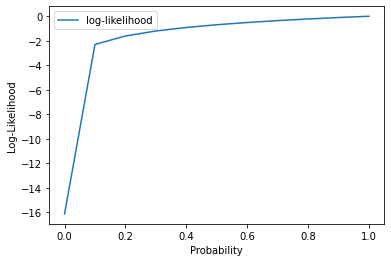

In [ ]:
# plot log-likelihoods of probabilities 0-100%

def logL(Y, predictions):
    return np.sum((Y * np.log(predictions)) + ((1-Y) * (1 - np.log(predictions))))

probs = np.arange(0,1.1,0.1)
clip_probs = np.clip(probs, 1e-7, 1 - 1e-7)
lls = [logL(1,p) for p in clip_probs]
# plot
plt.plot(clip_probs, lls, label='log-likelihood')
plt.legend()
plt.xlabel('Probability')
plt.ylabel('Log-Likelihood')
plt.show()

The function increases the log-likelihood from negative infinity to zero and is maximized as the probability approaches one. While we could maximize the predicted log-likelihoods (using gradient ascent) to get as close to 0 as possible (and therefore 100% probability), it is the convention for optimizers (optimization functions, ie. gradient descent) to minimize a value. Observe what occurs if we graph the negative log-likelihood across the probability spectrum:

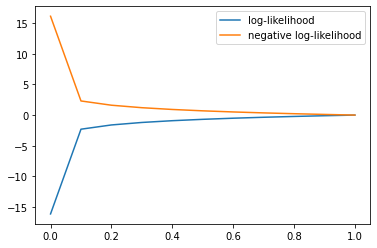

In [ ]:
nlls = [-logL(1,p) for p in clip_probs]

plt.plot(probs, lls, label='log-likelihood')
plt.plot(probs, nlls, label='negative log-likelihood')
plt.legend()
plt.show()

The function is mirrored over y=0, meaning the negative log-likelihood decreases from infinity to zero and is minimized as the probability approaches 100% (1.0). In keeping with convention, we'll minimize the negative log-likelihood instead of maximizing the log-likelihood. 

$-log(L)=-\sum_{i=1}^{n}y_ilog(\hat{y}_i)+(1-y_i)log(1-\hat{y}_i)$

The equation above is also referred to as the Binary Cross-Entropy, or simply the Cross-Entropy, which is the common term in machine learning. These equations change if the probability distribution of the outcome changes from having two possibilities (Bernoulli distribution) to multiple possibilities, which I'll cover later in the next post.

Below is the code for the Binary Cross-Entropy function:

In [ ]:
def binary_cross_entropy(Y, predictions):
    predictions = np.clip(predictions, 1e-7, 1 - 1e-7)
    return -np.mean((Y * np.log(predictions)) + ((1-Y) * np.log(1 - predictions)))

# Gradient Descent

Like linear regression, gradient descent is used to make corrections to the model after each iteration. In order to find the gradients, we have to find the derivative of our logistic model loss (the cross-entropy) with respect to the feature coefficients (also called weights) of the feature variables. 

$
\frac{\partial CE}{\partial \theta}
$

We'll break this down using the chain rule of derivatives, stepping backwards through the model to find the derivatives of the output with respect to an input. Let's first write out the model broken down into steps:

$
\begin{align}
X&=\text{Inputs} \\
Y&=\text{True Output/Ground Truth} \\
\theta&=\text{Weights/Feature Coefficients} \\
Z&=X\theta=\text{Linear Regression/Log Odds} \\
\hat{Y}&=\frac{1}{1+e^{-Z}}=\text{Logistic Function/Sigmoid/Probability} \\
CE&=-\sum Ylog(\hat{Y})+(1-Y)log(1-\hat{Y})=\text{Cross-Entropy Loss/Negative Log-Likelihood} \\
\end{align}
$

It's easy to write out the chain rule of a model when broken down into steps as shown above. The chain rule states that the derivative of a function within a function is the derivative of the outer function multiplied by the derivative of the inner, repeated until you have stepped backwards far enough to reach the variable you are solving with respect to.

$
\begin{align}
\frac{\partial f(g)}{\partial x}\left [ f(g(x)) \right ]=\frac{\partial f(g)}{\partial g(x)}\times \frac{\partial g(x)}{\partial x}=\text{chain rule}
\end{align}
$

Stepping backwards through our logistic model, the derivative of the cross-entropy loss with respect to the weights (feature coefficients/theta) is written as follows:

$
\begin{align}
\frac{\partial CE}{\partial \theta}\left [ Ylog(\hat{Y})+(1-Y)log(1-\hat{Y}) \right ]=\frac{\partial CE}{\partial \hat{Y}} \times \frac{\partial \hat{Y}}{\partial Z} \times \frac{\partial Z}{\partial \theta}
\end{align}
$

We'll begin with the derivative of the cross-entropy with respect to the output:

$
\begin{align}
&\frac{\partial CE}{\partial \hat{Y}}\left [ -Ylog(\hat{Y})+(1-Y)log(1-\hat{Y}) \right ] \\
&=\frac{\partial }{\partial \hat{Y}}\left [ -Ylog(\hat{Y}) \right ] + \frac{\partial }{\partial \hat{Y}}\left [ (1-Y)log(1-\hat{Y}) \right ] \\
\end{align}
$

Starting with the left side, the rule of derivatives states the derivative of the natural log of a value is one over that value. Because the derivative is multiplied by a constant (*Y*), the constant carries over.

$
\begin{align}
\frac{\partial }{\partial x}\left [ ln(x) \right ]&=\frac{1}{x}=\text{rule of natural log derivatives} \\
\frac{\partial }{\partial \hat{Y}}\left [ -Ylog(\hat{Y}) \right ]&=-Y\frac{1}{\hat{Y}}=-\frac{Y}{\hat{Y}} \\
\end{align}
$

Let's insert the answer and move on to the right side of the equation.

$
\begin{align}
-\frac{Y}{\hat{Y}} + \frac{\partial }{\partial \hat{Y}}\left [ (1-Y)log(1-\hat{Y}) \right ]
\end{align}
$

The multiplicative rule of derivatives states that the derivative of a function multiplied by another is equal to the derivative of the second multiplied by the first added to the derivative of the first multiplied by the second:

$
\begin{align}
\frac{\partial }{\partial x}\left [ fg \right ]&=f\frac{\partial }{\partial x}\left [ g \right ]+\frac{\partial }{\partial x}\left [ f \right ]g \\
\frac{\partial }{\partial \hat{Y}}\left [ (1-Y)log(1-\hat{Y}) \right ]&=(1-Y)\frac{\partial }{\partial \hat{Y}}\left [ log(1-\hat{Y} \right ]+\frac{\partial }{\partial \hat{Y}}\left [ 1-Y \right ]log(1-\hat{Y}) \\
&=(1-Y)\frac{1}{1-\hat{Y}}+(0)log(1-\hat{Y}) \\
\frac{\partial }{\partial \hat{Y}}\left [ (1-Y)log(1-\hat{Y}) \right ]&=\frac{1-Y}{1-\hat{Y}}
\end{align}
$

The full derivative of the cross-entropy is:

$
\begin{align}
\frac{\partial CE}{\partial \hat{Y}}&=\frac{1}{1-\hat{Y}}-\frac{Y}{\hat{Y}}
\end{align}
$

Next is the derivative of *Y^* with respect to *Z*:

$
\begin{align}
\frac{\partial \hat{Y}}{\partial Z}\left [ \frac{1}{1+e^{-Z}} \right ]&=\frac{\partial \hat{Y}}{\partial Z}\left [ (1+e^{-Z})^{-1} \right ] \\
&=\frac{\partial \hat{Y}}{\partial Z}\left [ (1+e^{-Z})^{-1} \right ]\frac{\partial \hat{Y}}{\partial Z}\left [ 1+e^{-Z} \right ] \\
&=-1(1+e^{-Z})^{-2}(0+\frac{\partial e^{-Z}}{\partial Z}\frac{\partial -Z}{\partial Z}) \\
&=-1(1+e^{-Z})^{-2}(e^{-Z})(-1) \\
&=(1+e^{-Z})^{-2}(e^{-Z}) \\
&=\frac{1}{(1+e^{-Z})^2}e^{-Z} \\
&=\frac{e^{-Z}}{(1+e^{-Z})^2} \\
&=\frac{1}{1+e^{-Z}}\frac{e^{-Z}}{1+e^{-Z}} \\
&=\frac{1}{1+e^{-Z}}\frac{1+e^{-Z}-1}{1+e^{-Z}} \\
&=\frac{1}{1+e^{-Z}}(\frac{1+e^{-Z}}{1+e^{-Z}}-\frac{1}{1+e^{-Z}}) \\
&=\frac{1}{1+e^{-Z}}(1-\frac{1}{1+e^{-Z}}) \\
\frac{\partial \hat{Y}}{\partial Z}\left [ \frac{1}{1+e^{-Z}} \right ]&=\hat{Y}(1-\hat{Y})
\end{align}
$

And finally, the derivative of *Z* with respect to *theta*:

$
\frac{\partial Z}{\partial \theta}\left [ X\theta \right ]=X
$

Now that we have all the separate derivatives solved, we can multiply them together and solve for the derivative of the cross-entropy with respect to *theta* (feature coefficients):

$
\begin{align}
\frac{\partial CE}{\partial \theta}&=(\frac{1-Y}{1-\hat{Y}}-\frac{Y}{\hat{Y}})\hat{Y}(1-\hat{Y})X \\
&=(\frac{\hat{Y}(1-Y)}{1-\hat{Y}}-\frac{\hat{Y}Y}{\hat{Y}})(1-\hat{Y})X \\
&=(\frac{\hat{Y}(1-Y)(1-\hat{Y})}{1-\hat{Y}}-\frac{\hat{Y}Y(1-\hat{Y})}{\hat{Y}})X \\
&=(\hat{Y}(1-Y)-Y(1-\hat{Y}))X \\
&=(\hat{Y}-\hat{Y}Y-Y+\hat{Y}Y)X \\
\frac{\partial CE}{\partial \theta}&=(\hat{Y}-Y)X
\end{align}
$

When multiple matrices are involved in an equation, the dimensions need to be checked to make sure the operation is valid.

$
\begin{align}
&n=\text{number samples} \\
&d=\text{number features} \\
&X = n \times d \\
&Y = n \times 1 \\
&(\hat{Y}-Y)X \\
&((n \times 1)-(n \times 1))(n \times d) \\
&(n \times 1)(n \times d) 
\end{align}
$

The inner dimensions don't match, which means the dot product (matrix multiplication) is not a viable operation as it is currently written and will throw an error if we attempt to code it as such.  To alleviate the mismatch, we'll move the *X* term to the front of the equation and use its transpose (reverse the dimensions, rows become columns and columns become rows).

$
\begin{align}
\frac{\partial CE}{\partial \theta}&=X^T(\hat{Y}-Y) \\
&=(d \times n) (n \times 1) \\
&=(d \times 1) \\
\theta &= (d \times 1)
\end{align}
$

Pause and reflect back on all the math we just went through to determine the gradient with respect to theta of the cross-entropy loss is simply the predictions minus the targets, multiplied by the inputs!

Let's turn the gradient equation into code:

In [ ]:
def get_gradient(X, Y, predictions):
    return (1/Y.shape[0])*X.T.dot(predictions - Y)

That completes the logistic regression model. Let's write the complete algorithm in mathematical notation and then turn it into code:

$
\begin{align}
&X=\text{Input} \\
&Y=\text{Target} \\
&\lambda=\text{Learning Rate} \\
&\text{Repeat until Convergence:} \\
&\hspace{5.6mm}\hat{Y}=\frac{1}{1+e^{-X\theta}} \\
&\hspace{5.6mm}CE = -\sum Ylog(\hat{Y})+(1-Y)log(1-\hat{Y}) \\
&\hspace{5.6mm}\frac{\partial CE}{\partial \theta}=X^T(\hat{Y}-Y) \\
&\hspace{5.6mm}\theta=\theta-\lambda\frac{\partial CE}{\partial \theta}
\end{align}
$




```
while not converged/for num iterations:
    make predictions
    calculate cross-entropy
    calculate gradient
    update weights
```



In [ ]:
class Logistic_Regression():

    def __init__(self):
        pass

    def fit(self, X, Y, learning_rate, num_iterations):

        # instantiate theta parameter if not already instantiated
        if not hasattr(self, 'theta'):
            self.theta = np.random.randn(X.shape[1],1)

        # instantiate a list to store cross entropy at each iteration
        self.binaryCE = []

        for i in range(num_iterations):
            Z = X.dot(self.theta)
            predictions = logistic_func(X, Z)
            bce = binary_cross_entropy(Y, predictions)
            self.binaryCE.append(bce)
            # print(f'cross-entropy = {bce}')
            gradient = get_gradient(X, Y, predictions)
            self.theta = self.theta - learning_rate*gradient

    def predict_probabilities(self, X):
        Z = X.dot(self.theta)
        return logistic_func(X, Z)

    def predict(self, X, threshold):
        Z = X.dot(self.theta)
        return logistic_func(X, Z)>=threshold

# Correlation

I detailed covariance and correlation in my previous post (DEMYSTIFYING THE MATH BEHIND FEATURE SELECTION AND REGRESSION MODEL TESTING). Like linear regression, it's important to check that the features are correlated with the target, else there is no need to include the feature in the model since it has no relation with the target and would just introduce noise. The Pandas package makes it easy to calculate the correlation between each feature and plot a correlation matrix:

<AxesSubplot:>

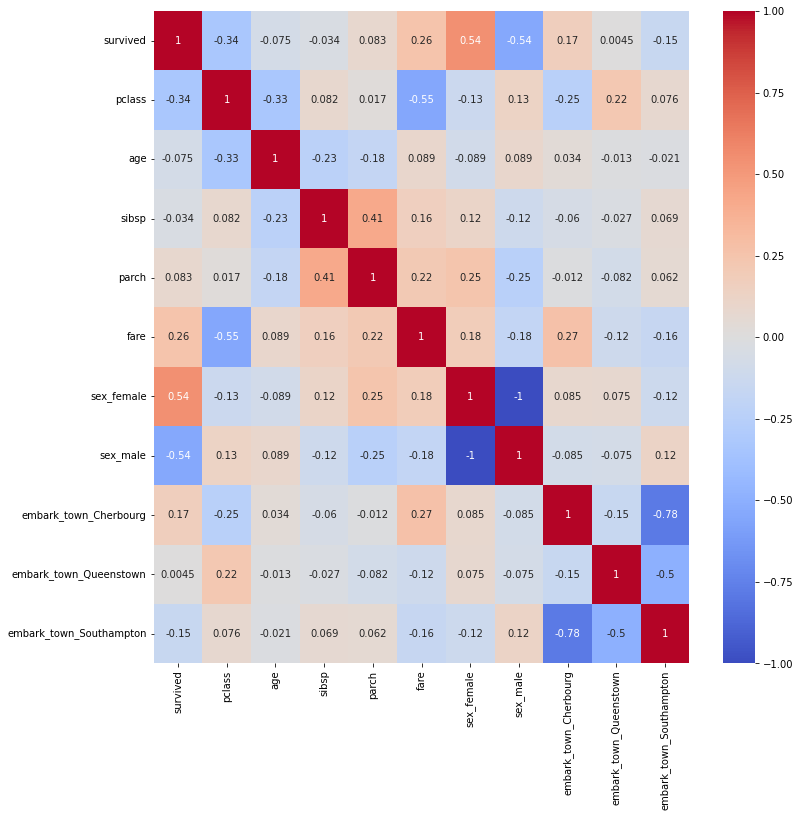

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

The strongest correlations to survival look to be sex and the passenger class. 

Being a male is strongly negatively correlated, meaning if the passenger was a male the probability of not surviving increases.  Female is the opposite, which makes sense because if you are not male, then you are female. Either could be removed from the model and not hurt the model's accuracy since they explain each other. This correlation sounds correct because it was women and children that were saved first.

The passenger class also shows a strong negative correlation with survival, meaning as the class increases (signifying a lower class ticket) the lower the chance of survival. This correlation also makes sense. The more upper class the ticket, the higher the probability of survival, most likely due to preferential treatment.

For now, we'll keep all the features as part of the model since they all seem to correlate with survival at some level.

# Feature Scaling

DEMYSTIFYING THE MATH BEHIND MULTIPLE REGRESSION detailed the need to scale features before passing the data through the model to ensure stability throughout gradient descent. Since the categorical (discrete) features (class, sex, embark location) are either 1's or 0's and the fare and age feature variables range from 0 to 500 (continuous), it's important to scale them down so they don't cause gradient descent to solely focus on correcting their coefficients and destabilize the algorithm.  Below is the same function we used to solve the multiple regression scenario in a previous article:

In [ ]:
class StandardScaler():

    def __init__(self):
        self.mean = None
        self.standard_deviation = None

    def fit(self, data):
        self.mean = np.mean(data, axis=0)
        self.standard_deviation = np.sqrt(np.mean(np.square(data-self.mean), axis=0))

    def transform(self, data):
        return (data-self.mean)/self.standard_deviation

Let's scale the fare and age features down using Standardization, giving them a mean of 0 and a standard deviation of 1:

In [ ]:
scaler = StandardScaler()
scaler.fit(data[['age','fare']])
data[['age','fare']] = scaler.transform(data[['age','fare']])
data

,survived,pclass,age,sibsp,parch,fare,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,-0.589588,1,0,-0.500240,1,0,1
1,1,1,0.644880,1,0,0.788947,0,0,0
2,1,3,-0.280971,0,0,-0.486650,0,0,1
3,1,1,0.413417,1,0,0.422861,0,0,1
4,0,3,0.413417,0,0,-0.484133,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,-0.203817,0,0,-0.384475,1,0,1
887,1,1,-0.821050,0,0,-0.042213,0,0,1
888,0,3,-0.000129,1,2,-0.174084,0,0,1
889,1,1,-0.280971,0,0,-0.042213,1,0,0


# Train-Test Split/Cross-Validation

In my previous post (DEMYSTIFYING THE MATH BEHIND FEATURE SELECTION AND REGRESSION MODEL TESTING) I went over the concept of splitting the data into training, testing, and a validation set. In a nutshell, in order to get an accurate assessment of how the model is performing, it should be tested using data it has never seen before (not trained on). This data is called the validation set. Additionally, data fed to the model for training can be split into separate, equal chunks called folds. In every iteration, a fold is held to be used as a test set until every fold has been used. The loss is calculated using the average loss over each test fold. This process is termed k-fold cross-validation.

INSERT K-FOLD CROSS VALIDATION IMAGE

We could code our own train_test_split function, but because the dataset is imbalanced (more non-survivors than survivors) which could lead to very few minority class (survived) samples in the test set, we'll use the train_test_split function from Scikit-Learn because it offers the ability to 'stratify' the split, meaning the train and test set will have the same class balance distribution as the original dataset. 

In [ ]:
def cross_validate(model, x_train, x_test, y_train, y_test, iterations, learning_rate):

    # turn y_train and y_test into 2d matrix if its passed as a 1d
    # if len(y_train.shape) == 1:
    #     y_train = y_train.reshape((-1,1))
    # if len(y_test.shape) == 1:
    #     y_test = y_test.reshape((-1,1))

    # instantiate theta
    # model.theta = np.random.randn(x_train.shape[1],1)

    # split train into k folds
    folds = 10
    fold_size = len(x_train) // folds

    # initialize array to store mses
    train_losses = []

    for i in range(iterations):
        # reset fold mses array to be empty
        fold_losses = []

        for k in range(folds):
            # get range of indices to use as test fold
            test_fold = np.arange(k*fold_size,(k+1)*fold_size)
            # set train and test data according to current test fold
            x_train_fold = np.delete(x_train, test_fold, axis=0)
            y_train_fold = np.delete(y_train, test_fold, axis=0)
            x_test_fold = np.take(x_train, test_fold, axis=0)
            y_test_fold = np.take(y_train, test_fold, axis=0)

            # run regression on training folds
            # probabilities = model.predict(x_train_fold)
            # train_loss = binary_cross_entropy(y_train_fold, probabilities)
            # gradient = get_gradient(x_train_fold, y_train_fold, probabilities)
            # model.theta = model.theta - learning_rate*gradient
            model.fit(x_train_fold, y_train_fold, learning_rate, 1)

            # test on test fold
            probabilities = model.predict_probabilities(x_test_fold)
            test_loss = binary_cross_entropy(y_test_fold, probabilities)

            fold_losses.append([model.binaryCE[0], test_loss])

        train_losses.append(np.mean(fold_losses, axis=0))
        # if i % 10 == 0:
        #     print(f'Iteration {i}: {mses[-1]}')

    # test validation data to determine true MSE
    probabilities = model.predict_probabilities(x_test)
    validation_loss = binary_cross_entropy(y_test, probabilities)
    # print(f'Final MSE on validation data: {mse}')

    return validation_loss, np.array(train_losses), probabilities

What happens if the data is run through the logistic model using our k-fold cross-validation function?

In [ ]:
# import train_test_split from sklearn
from sklearn.model_selection import train_test_split
# set random seed to be able to reproduce results
np.random.seed(42)
# create model
model = Logistic_Regression()
# set X and turn into numpy array
X = data.drop(columns=['survived']).to_numpy()
# set Y data, turn into numpy array and reshape to be column vector shape(Nx1)
Y = data['survived'].to_numpy().reshape((-1,1))
# add column of ones to X for bias term (y-intercept)
X = np.column_stack((np.ones((X.shape[0],1)),X))
# split data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.20, random_state=42, stratify=Y)
# run cross-validation
validation_loss, train_losses, probabilities = cross_validate(model, x_train, x_test, y_train, y_test, 5000, 0.01)

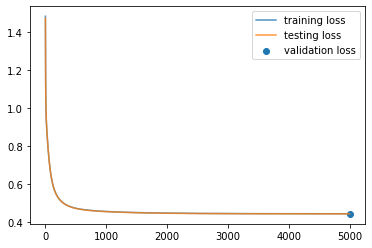

In [ ]:
# plot training and testing losses and validation loss
plt.plot(train_losses[:,0], alpha=0.8, label='training loss')
plt.plot(train_losses[:,1], alpha=0.8, label='testing loss')
plt.scatter(x=5000, y=validation_loss, label='validation loss')
plt.legend()
plt.show()

The model seems to converge around the 3000th iteration, and the validation set's loss score is close to the training and testing loss curve. Keep in mind the model has never seen the data in the validation set, so to score a loss this close to the training and testing set indicates our model hasn't overfit the training data. We'll set the classification threshold to 0.5, meaning everyone predicted at or above a 50% probability of survival will be predicted to survive. Below, a dataframe is created with the model's predicted probability of survival, the predicted classification, and the true classification.

In [ ]:
df = pd.DataFrame()
df['probability'] = probabilities.flatten()
df['prediction'] = model.predict(x_test, 0.5)
df['true'] = y_test
df

,probability,prediction,true
0,0.053038,False,0
1,0.171766,False,0
2,0.171766,False,0
3,0.094652,False,0
4,0.074373,False,0
...,...,...,...
173,0.714949,True,1
174,0.126420,False,0
175,0.232531,False,0
176,0.945905,True,1


The model seems to be classifying most of the passengers correctly, but how can we determine how well it is doing?

# Confusion Matrix

The confusion matrix allows us to visualize how the model is performing across multiple dimensions. The data is separated by its predicted and true labels into the following categories:
- True Positive: positives that were predicted positive
- False Positive: negatives that were predicted positive. Also referred to as Type 1 Errors
- True Negative: negatives that were predicted negative.
- False Negative: positives that were predicted negative. Also referred to as Type 2 Errors 

It's easier when visualized, so below is an image of how a confusion matrix is formatted:

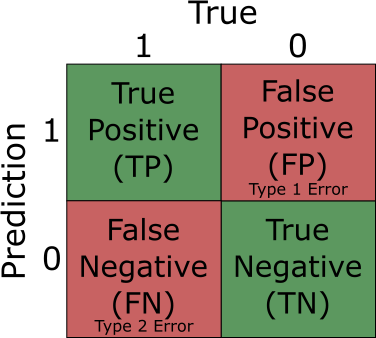

<AxesSubplot:xlabel='probability', ylabel='Density'>

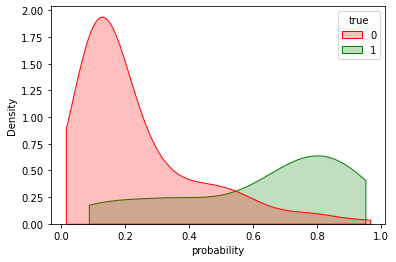

In [ ]:
# write a function that takes in predicted probabilities and true values and plots
# a histogram/kde of each
sns.kdeplot(data=df, x='probability', hue='true', palette=['red','green'], fill=True, cut=0)

Before we create a function calculating the confusion matrix of our model, take a look at the distribution plots below showing the true value of the target across the predicted probabilities of both stratified and non-stratified training data. Different thresholds are shown to demonstrate how it influences how the model classifies the data.

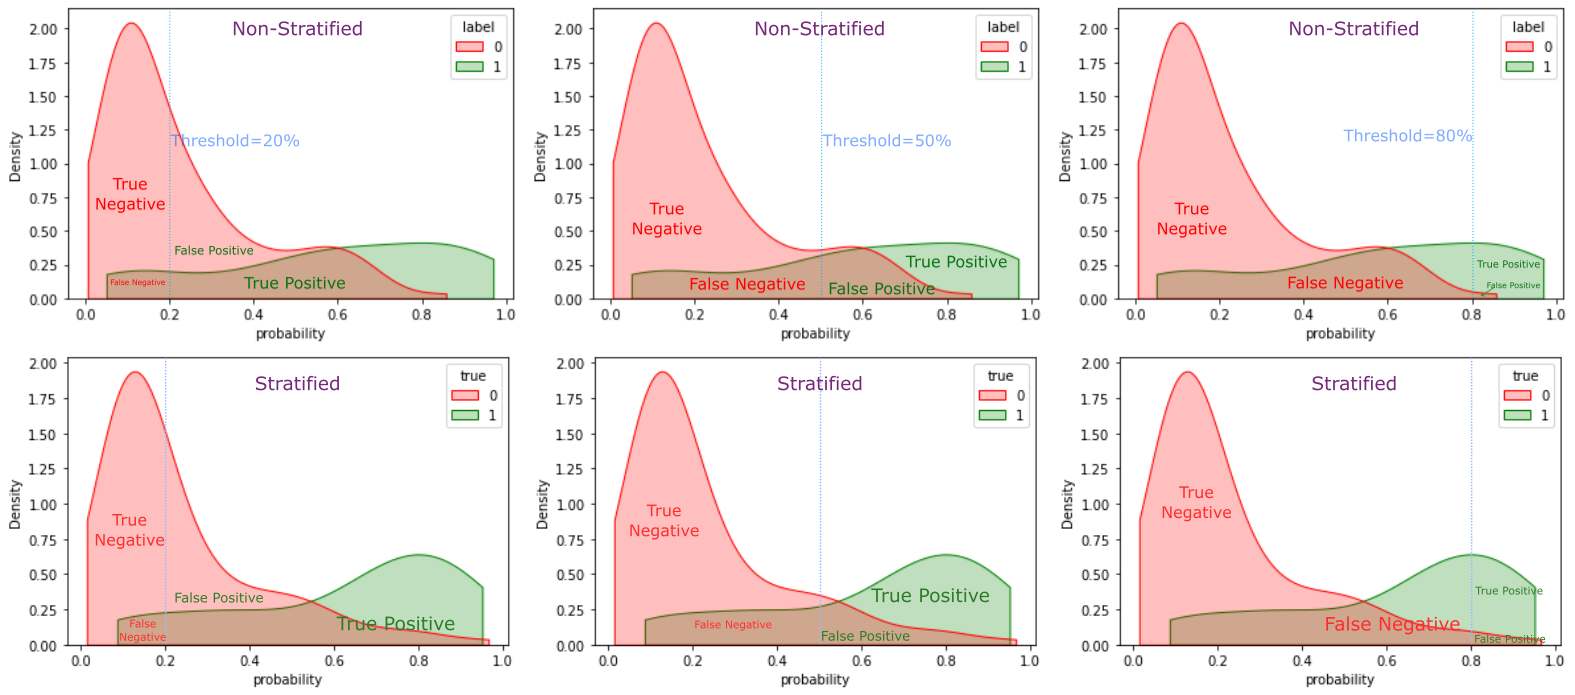

Stratifying the training data helped the model separate the target (survived). As the classification threshold is moved along the x-axis, the sizes of the classification metrics (true positive, false positive, true negative, false negative) increase or decrease. Because the model wasn't able to definitively separate the positives from the negatives, there will be an overlap between the distributions. We can speculate as to why this occurred, but overlap will occur in the majority of logistic regression models, leaving it up to us to find a balance between tweaking the feature variables to try and achieve better separation between the distributions and moving the classification threshold to minimize the error type (1 or 2) deemed most costly. There are metrics that are covered later on in this post that will make finding this balance much easier.

Let's write a python function that takes in the true labels and predictions, as well as the names we wish to assign to the labels, and returns a confusion matrix and a nicely formatted plot:

In [ ]:
def confusion_matrix(Y, predictions, plot=True, true_label='True', false_label='False'):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    # take in predictions and true labels
    for t,p in zip(Y,predictions):
        # if true label is 1
        if t == 1:
            ## if predicted label is 1
            if p == 1:
                ### True Positive +1
                tp += 1
            ## if predicted label is 0
            else:
                ### False Negative +1
                fn += 1
        # if true label is 0
        else:
            ## if predicted label is 1
            if p == 1:
                ### False postive +1
                fp += 1
            ## if predicted label is 0
            else:
                ### True negative +1
                tn +=1

    cm = np.array([[tp,fp],[fn,tn]])
    if plot == True:
        plot = sns.heatmap(cm, annot=True, fmt='.0f', cmap='coolwarm', xticklabels=[true_label, false_label], yticklabels=[true_label, false_label])
        plt.ylabel('Predicted Label')
        plt.xlabel('True Label')
        plt.title('Confusion Matrix')
    
        return cm, plot
    else:
        return cm

Passing our model's predictions and true labels into the function above produces the following confusion matrix (keep in mind this was using a 50% classification threshold).

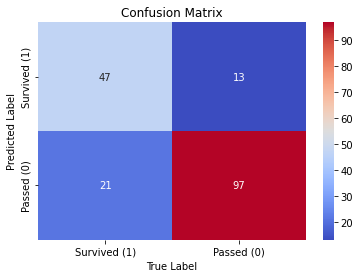

In [ ]:
cm, plot = confusion_matrix(df['true'], df['prediction'], true_label='Survived (1)', false_label='Passed (0)')
plt.show(plot)

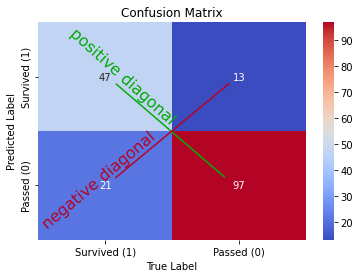

The model classified far more passengers correctly (positive diagonal) than incorrectly (negative diagonal). It is suffering from a type 2 error issue, though. Out of the 68 survivors (47+21), it classified 21 of them wrong! That's 31%! This is something we should keep an eye on and see if we can improve as the model is tweaked. 

There are a couple of important metrics that can be calculated using the confusion matrix that gives us further insight into how the model is performing:

$
\begin{align}
\text{precision}&=\frac{TP}{TP+FP}=\text{what percentage of predicted positives were positive} \\
\text{negative precision}&=\frac{TN}{TN+FN}=\text{what percentage of predicted negatives were negative} \\
\text{sensitivity/recall}&=\frac{TP}{TP+FN}=\text{what percentage of positives were predicted positive} \\
\text{specificity}&=\frac{TN}{TN+FP}=\text{what percentage of negatives were predicted negative} \\
\text{accuracy}&=\frac{TP+TN}{TP+TN+FP+FN}=\text{what percentage of predictions were correct} \\
F_1\text{ score}&=2\times\frac{\text{precision}\times\text{recall}}{\text{precision}+\text{recall}}=\text{the harmonic mean of the precision and recall}
\end{align}
$

Harmonic mean?
The harmonic mean is used to calculate the true average when working with probabilities/ratios/rates.

$
\begin{align}
n&=\text{number of data points} \\
x_n&=n^{th}\text{ probability/rate/ratio in dataset} \\
\text{harmonic mean}&=\frac{n}{\frac{1}{x_1}+\frac{1}{x_2}+...+\frac{1}{x_n}} \\
F_1\text{ score}&=\frac{2}{\frac{1}{\text{recall}}\times\frac{1}{\text{precision}}}=2\times\frac{\text{precision}\times\text{recall}}{\text{precision}+\text{recall}}
\end{align}
$

Here is an image I put together to help you remember each metric and its purpose.

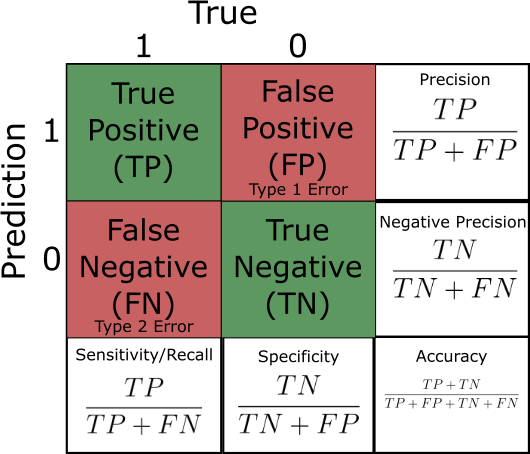

Below is a function that takes in a confusion matrix as a parameter, calculates the above metrics, and prints a classification report:

In [ ]:
def classification_report(confusion_matrix):
    tp,fp,fn,tn = confusion_matrix.flatten()
    precision = tp/(tp+fp)
    negative_precision = tn/(tn+fn)
    recall = tp/(tp+fn)
    specificity = tn/(tn+fp)
    accuracy = (tp+tn)/(tp+fp+tn+fn)
    f_score = 2*((precision*recall)/(precision+recall))
    print(f'precision: {precision}\nnegative precision:{negative_precision}\nrecall: {recall}\nspecificity: {specificity}\naccuracy: {accuracy}\nf1 score: {f_score}')

In [ ]:
classification_report(cm)

precision: 0.7833333333333333
negative precision:0.8220338983050848
recall: 0.6911764705882353
specificity: 0.8818181818181818
accuracy: 0.8089887640449438
f1 score: 0.7343749999999999


Overall the model's accuracy is about 81%.  Of the positives the model predicted, 78% were actually positive (precision), and out of all positives, it correctly predicted about 69% of them (recall). Depending on the purpose of the model, you may want to maximize precision or recall, but rarely both because as one increases, the other tends to decrease (the more positives that are correctly predicted, the more false positives there tend to be and vice versa. Refer to the distribution plots above to convince yourself this is true). It is up to you to determine which errors are more costly to the purpose of the model (type 1 or 2) which will then lead you to tune parameters towards acceptable precision and recall values. Before running some experiments to see if we can increase the precision and recall (and in turn accuracy and f1), let's go over a few more metrics that will help us determine which parameters yield the best model.

# R-Squared/Coefficient of Determination

Like linear regression, the Coefficient of Determination (commonly referred to as R-Squared) is used to measure how much of the variation of the target variable is explained by the features. Because logistic regression deals with probabilities, the calculation of this metric is different than its linear counterpart. There are a few ways to estimate this value, but a popular method used is called McFadden's Pseudo R-Squared which involves calculating the 'log-likelihood' and 'log-likelihood fit'.

$
\begin{align}
R^2&=\frac{\text{log likelihood}-\text{log likelihood fit}}{\text{log likelihood}}
\end{align}
$ 

What this function is doing is finding the difference between the log of the true likelihood (probability) and the predicted log of the likelihood (probability) of the data and then scaling it by the log of the true likelihood (probability) to put it on a scale between 0 and 1.

Calculating the log-likelihood is fairly straightforward. It involves summing all the log-likelihoods (probabilities) of the target being equal to one (survived). Like maximum likelihood, we have to convert all the likelihoods where the target equals zero into likelihoods of the target being equal to one by subtracting the likelihood from 1.0 (100%):

$
\begin{align}
p(0)&=y \\
p(1)&=1.0-y \\
&\text{example} \\
p(0)&=0.4 \\
p(1)&=1.0-0.4=0.6
\end{align}
$

The formula for calculating the log-likelihood is below:

$
\begin{align}
\text{log likelihood}&=\sum_{i=1}^n(log(\frac{\sum_{i=1}^{n}y_i}{n}y_i)+log(1-\frac{\sum_{i=1}^{n}y_i}{n})(1-y_i))
\end{align}
$

Let's convert the equation into a python function:

In [ ]:
def log_likelihood(Y):
    likelihood = np.sum(Y)/len(Y)
    return np.sum((Y*np.log(likelihood))+((1-Y)*(np.log(1-likelihood))))

Because the R-squared value is calculated by comparing the true likelihoods to the predicted ones, we simply predict the likelihood of the input data (features) using the logistic function and the current values of theta.  Again, all the likelihoods have to be put in terms of survival (*target/y = 1*). 

$
\begin{align}
\text{log likelihood fit}&=\sum_{i=1}^n(log(f(x_i)y_i)+log(1.0-f(x_i))(1-y_i))
\end{align}
$

Below is the python function calculating the above log-likelihood fit equation:

In [ ]:
def log_likelihood_fit(model, X, Y):
    return np.sum((Y*np.log(model.predict_probabilities(X)))+((1-Y)*(np.log(1-model.predict_probabilities(X)))))

By combining the log-likelihood and log-likelihood fit functions above into one function, we can calculate the R-squared:

In [ ]:
def r_squared(model, X, Y):
    log_like = log_likelihood(Y)
    log_like_fit = log_likelihood_fit(model, X, Y)
    return (log_like - log_like_fit)/log_like

Let's run our model through the r_squared function to get the r_squared value of the target (survived):

In [ ]:
r_squared(model, x_test, y_test)

0.3350961861581476

Interestingly, we have achieved 81% accuracy explaining only 34% of the target variable. This indicates that about 66% of the variance in the target is not accounted for by the features we are using. In order to achieve much higher accuracy using a logistic regression model, we would need to increase its r-squared value by finding other features of the passengers that correlate with the 'survived' metric.

# P-Values

Before we can confidently say our regression model is 80% accurate, we need to make sure the relationships found (feature coefficients) between the features and the target were not due to chance and therefore statistically significant. This is done by using a 'chi-square' distribution (which is just the normal distribution squared) and calculating the 'x-squared' value. This value takes the residual (difference) between the log-likelihood fit and log-likelihood and scales it so it can be plotted to a chi-square distribution.  The probability density function (pdf) of a chi-square distribution is then used to calculate the p-value of x-squared. The pdf of a chi-square distribution is pretty ugly. I'll write out the equation below but use the scipy package to implement it.

$
\begin{align}
\text{chi-square}&=\text{normal distribution}^2 \\
\chi^2&=2(\text{log-likelihood fit}-\text{log-likelihood}) \\
pdf(x,k)&=\begin{cases}
\frac{x^{\frac{k}{2}-1}e^{-\frac{x}{2}}}{2^{\frac{k}{2}}\Gamma(\frac{k}{2})}& \text{ if } x>0 \\
0 & \text{ if } x<=0
\end{cases},\text{where }x=\chi^2,k=\text{degrees of freedom}=\text{num features}-1
\end{align}
$

Below is the code turning the equations above into a python function that returns a p-value:

In [ ]:
from scipy.stats import chi2
def p_value(model, X, Y, k):
    # calculate log-likelihood of model
    ll = log_likelihood(Y)
    # calculate log-likelihood fit of model
    llf = log_likelihood_fit(model, X, Y)
    # calculate chi-squared value
    x2 = 2*(llf-ll)
    p = chi2.pdf(x2,k)
    return p

In [ ]:
# calculate degrees of freedom (num_features - 1)
k = model.theta.shape[0] - 1 # 11-1=10
# calculate p-value
p_value(model, x_test, y_test, k)

3.079818398616783e-14

Our result is extremely statistically significant. A standard p-value threshold used is 0.05 (5% probability result due to randomness) and our p-value is 3.08e-14, that's 0.0000000000000303, or 0.000000000003% probability the results of the logistic model are due to random chance.

# Receiver Operating Characteristic (ROC) Curve, J Statistic and Area Under Curve (AUC)

It would be very tedious and time-consuming to analyze tens, hundreds, or sometimes even thousands of confusion matrices to determine which model is best. This is where the Receiver Operating Characteristic (ROC) curve and Area Under Curve (AUC) metrics come in handy.

The ROC curve is a probability curve showing the rate of true positives (sensitivity/recall) over the rate of false positives (1-specificity) at every threshold value. Because we want to maximize true positives and minimize false positives, the best threshold value would appear at the top left of the graph, where the true positive rate is 1.0 (100%) and the false positive rate is 0. Of course, this is not often the case, as the false positive rate tends to increase as the true positive rate increases. A balance must be struck between the two that enables the model to best distinguish between positive and negative classifications. That balance will be the threshold value that appears at the top leftmost point along the ROC curve.

$
\begin{align}
\text{True Positive Rate}&=\frac{TP}{TP+FN} \\
\text{False Positive Rate}&=\frac{FP}{FP+TN}
\end{align}
$

Below is a function that will take a model and a test data set and return a ROC curve (list of true positive and false positive rates).

In [ ]:
def roc(model, Y, test_data):
    # create an empty array to store all true positive and false positive rates
    rates = []
    # run predictions across all thresholds, calculate the confusion matrix,
    # classification report metrics, and roc values
    for threshold in np.arange(0,1.01,0.01).round(2):
        # make predictions on data using threshold
        preds = model.predict(test_data, threshold)
        # compute the confusion matrix (no need to return plot, just numbers)
        cm = confusion_matrix(Y, preds, plot=False)
        # set indices of confusion matrix to TP,FP,FN,TN variables
        tp,fp,fn,tn = cm.flatten()
        # compute TPR and FPR
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        # append tpr and fpr to rates array
        rates.append([tpr,fpr,threshold])
    return np.array(rates)


Let's run the model through the roc function above and plot the curve.

In [ ]:
rates = roc(model, y_test, x_test)

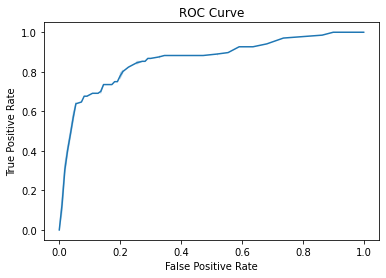

In [ ]:
rates_db = pd.DataFrame(rates, columns=['True Positive Rate', 'False Positive Rate', 'Threshold'])
sns.lineplot(data=rates_db, x='False Positive Rate', y='True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
rates_db

,True Positive Rate,False Positive Rate,Threshold
0,1.0,1.000000,0.00
1,1.0,1.000000,0.01
2,1.0,0.990909,0.02
3,1.0,0.990909,0.03
4,1.0,0.990909,0.04
...,...,...,...
96,0.0,0.009091,0.96
97,0.0,0.000000,0.97
98,0.0,0.000000,0.98
99,0.0,0.000000,0.99


Take a look at the rates database (rates_db). As the threshold increases, the true positive and false positive rates decrease until they both hit zero at the 97% threshold. Looking at the ROC Curve plot, the upper right is where both TPR and FPR are 1.0, which is at a threshold of 0%. Moving left, the TPR and FPR decrease, meaning our threshold is  increasing. Which threshold is best? It really depends on the purpose of the model. False negatives may be very undesirable (think cancer diagnoses) and the goal of the model might be to eliminate them as much as possible at the expense of some false positives. If, however, both types of errors carry the same weight (cost error type 1 = cost error type 2) the best threshold is the one that yields the maximum separation between the true and false positive rates. This is called the J statistic and is very easy to compute:

$
\begin{align}
J&=TPR-FPR \\
&=\text{sensitivity}+\text{specificity}-1 \\
&=\frac{TP}{TP+FN}+\frac{TN}{TN+FP}-1
\end{align}
$

Because we already have the true positive and false positive rates (thanks to our ROC function) we'll use the first equation to compute the J statistic of the model:

In [ ]:
def j_statistic(tpr, fpr, thresholds):
    j_stats = tpr-fpr
    return np.array(sorted(zip(j_stats, thresholds), reverse=True))

In [ ]:
j_stats = j_statistic(rates[:,0], rates[:,1], rates[:,2])

In [ ]:
j_stats[:5]

array([[0.59973262, 0.33      ],
       [0.59839572, 0.29      ],
       [0.59625668, 0.32      ],
       [0.59465241, 0.57      ],
       [0.59465241, 0.56      ]])

The top 5 J stats are very close to each other. Let's see where these thresholds fall on the ROC Curve:

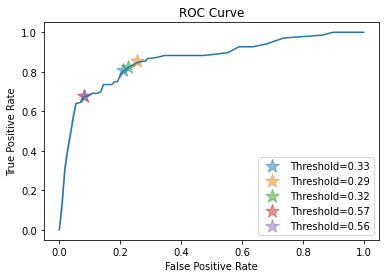

In [ ]:
sns.lineplot(data=rates_db, x='False Positive Rate', y='True Positive Rate')

for threshold in j_stats[:5,1]:
    plt.scatter(rates_db['False Positive Rate'][rates_db['Threshold'] == threshold], rates_db['True Positive Rate'][rates_db['Threshold'] == threshold], label=f'Threshold={threshold}', marker='*', s=200, alpha=0.5)
plt.legend()
plt.title('ROC Curve')
plt.show()

The above chart confirms the best thresholds are located at the upper left side of the ROC curve. We can calculate the precision, recall, and f1 scores of the model at these thresholds in our analysis to determine the best model. There is one final metric that will help in determining which model is best at classifying the passengers, and that is the Area Under the Curve (AUC). AUC calculates how efficient the model is at classifying the target metric correctly (how well the model has separated the distributions of the target. Refer back to the distribution plots above). It represents the percentage of the area of the graph that is below the ROC curve. A perfect score is 1.0, meaning the model has been able to completely separate the target data at some threshold. The ROC curve would move straight to the top left corner of the graph and then turn right along the top until hitting the right-most part of the graph, meaning the entire graph would be under the curve. A score of 0 means the model predicts incorrectly every time. The ROC curve moves along the bottom of the graph and up the right-most side. A score of 0 indicates you have a perfectly inverted model, and simply inverting the probabilities would yield a perfect model (AUC=1.0). The worst score is 0.5. This indicates the model has not been able to separate the target data to any extent and is as good as randomly guessing. The probability distributions of each would lay directly on top of each other rendering the model useless. The ROC curve would run diagonally from the bottom left to the top right of the graph.

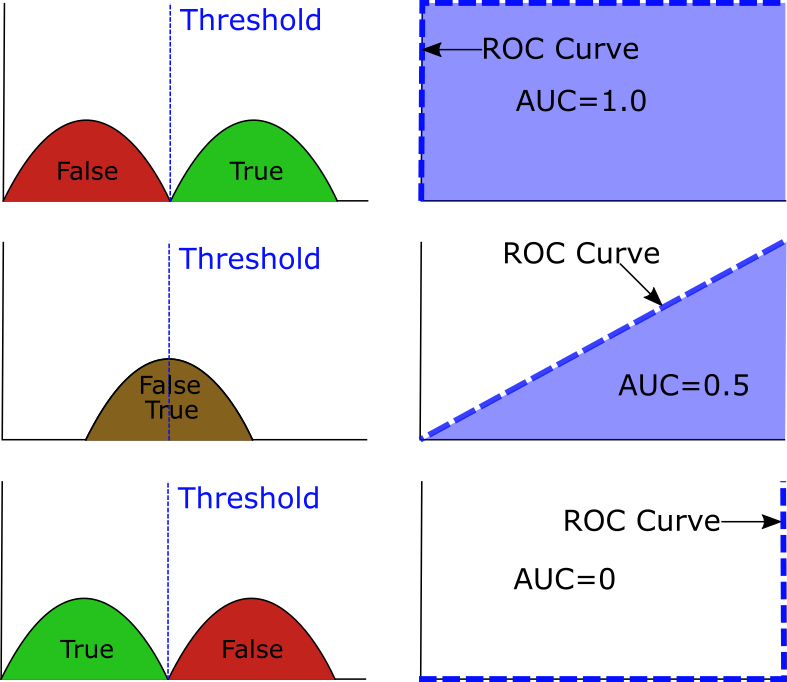

How far above the 0.5 (50%) ROC curve indicates how much better than random the model is at differentiating between target classes. The formula for AUC is another ugly one. I'll write it out below, but we'll use the scikit-learn library's roc_auc_score function to calculate.

$
\begin{align}
AUC(f)&=\frac{\sum_{t_0\in D^0}\sum_{t_1\in D^1}1|f(t_0)<f(t_1)|}{|D^0|\cdot|D^1|} \\
1|f(t_0)<f(t_1)|&=\text{indicator function that returns 1 if } f(t_0)<f(t_1) \\
D^0&=\text{set of negative examples} \\
D^1&=\text{set of positive examples}
\end{align}
$

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, model.predict_probabilities(x_test))

0.8598930481283422

The model achieves an AUC of about 0.86, 0.36 better than guessing. We'll see if we can increase this closer to 1.0.

Before continuing, let's write a function that combines all the metrics covered and returns a report. To do so, we'll rewrite the classification_report function. 

In [ ]:
def classification_report(model, x_test, y_test):
    # prediction probabilities
    probabilities = model.predict_probabilities(x_test)
    # p-value
    pv = p_value(model, x_test, y_test, model.theta.shape[0]-1)
    # r-squared
    r2 = r_squared(model, x_test, y_test)
    # roc curve, j-stat and AUC
    roc_curve = rates = roc(model, y_test, x_test)
    j_stats = j_statistic(roc_curve[:,0], roc_curve[:,1], roc_curve[:,2])
    auc = roc_auc_score(y_test, probabilities)
    # create lists to store metrics
    accuracies = []
    recalls = []
    precisions = []
    negative_precisions = []
    specificities = []
    f_scores = []
    # per threshold metrics
    for threshold in j_stats[:5,1]:
        predictions = model.predict(x_test, threshold)
        cm = confusion_matrix(y_test, predictions, plot=False)
        tp,fp,fn,tn = cm.flatten()
        precisions.append(tp/(tp+fp))
        negative_precisions.append(tn/(tn+fn))
        recalls.append(tp/(tp+fn))
        specificities.append(tn/(tn+fp))
        accuracies.append((tp+tn)/(tp+fp+tn+fn))
        f_scores.append(2*((precisions[-1]*recalls[-1])/(precisions[-1]+recalls[-1])))
    report_df = pd.DataFrame()
    report_df['threshold']=j_stats[:5,1]
    report_df['AUC']=np.round(auc,4)
    report_df['J-stat']=np.round(j_stats[:5,0],4)
    report_df['accuracy']=np.round(accuracies,4)
    report_df['recall']=np.round(recalls,4)
    report_df['precision']=np.round(precisions,4)
    report_df['neg_precision']=np.round(negative_precisions,4)
    report_df['specificity']=np.round(specificities,4)
    report_df['f_score']=np.round(f_scores,4)
    report_df['r-squared']=np.round(r2,4)
    report_df['p-value']=pv
    
    return report_df

In [ ]:
model_report = classification_report(model, x_test, y_test)
model_report

,threshold,AUC,J-stat,accuracy,recall,precision,neg_precision,specificity,f_score,r-squared,p-value
0,0.33,0.8599,0.5997,0.7978,0.8088,0.7051,0.8700,0.7909,0.7534,0.3351,3.079818e-14
1,0.29,0.8599,0.5984,0.7865,0.8529,0.6744,0.8913,0.7455,0.7532,0.3351,3.079818e-14
2,0.32,0.8599,0.5963,0.7921,0.8235,0.6914,0.8763,0.7727,0.7517,0.3351,3.079818e-14
3,0.57,0.8599,0.5947,0.8258,0.6765,0.8364,0.8211,0.9182,0.7480,0.3351,3.079818e-14
4,0.56,0.8599,0.5947,0.8258,0.6765,0.8364,0.8211,0.9182,0.7480,0.3351,3.079818e-14


Every test can now be run on a model across the top 5 thresholds and formatted into a pandas dataframe for analysis.

# Class Imbalances

Last, but certainly not least, I have to touch on the concept of class imbalance. 

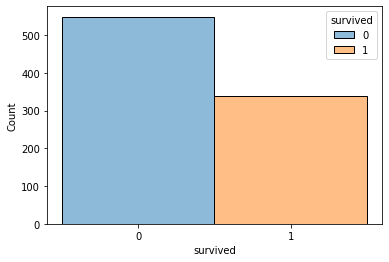

In [ ]:
h = sns.histplot(data, x='survived', hue='survived', bins=2, discrete=True)
h.set_xticks(range(2))
plt.show()

The dataset contains many more passengers who passed than survived and in turn can cause the model not to learn to separate the data as well and become biased towards the dominant class (refer to stratified vs. non-stratified distribution of true labels above). The easiest way to correct the issue is to simply duplicate the minority class data until it equals the number of datapoints represented by the dominant class. Another option would be to generate synthetic data. SMOTE (Synthetic Minority Oversampling Technique) is a popular python library that uses an unsupervised machine-learning algorithm called k-nearest neighbor to generate synthetic data between a randomly selected datapoint of the minority class and a randomly selected 'nearest neighbor'. The number of nearest neighbors considered can be controlled by setting the k_neighbors parameter. Because our dataset includes both categorical (sex, embark town) and continuous (age, fare, pclass, sibsp, parch) data, we have to use the SMOTE-NC variation to not get categorical feature values that wouldn't make sense (ie sex_male=0.65).

Below we import the SMOTE-NC package from imblearn library and create a function that takes as parameters the X and Y data, a list of indices indicating the columns of the categorical features in X, and the number of neighbors to use for the k-nearest neighbors algorithm. It returns a resampled X and Y dataset with an equal representation of the classes in Y.

In [ ]:
from imblearn.over_sampling import SMOTENC

In [ ]:
def smote_nc(X, Y, categorical_features, neighbors):
    smote = SMOTENC(random_state=42, categorical_features=categorical_features, k_neighbors=neighbors)
    x_smote, y_smote = smote.fit_resample(X=X, y=Y)
    return x_smote, y_smote

Let's start by using an augmented dataset using 5 neighbors and see if that makes any impact on the model. This is only performed on the training data because we want to test on actual (non-augmented) data.

In [ ]:
x_smote, y_smote = smote_nc(x_train, y_train, [5,6,7], 5)
# turn y_smote into column vector (Nx1)
y_smote = y_smote.reshape((-1,1))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


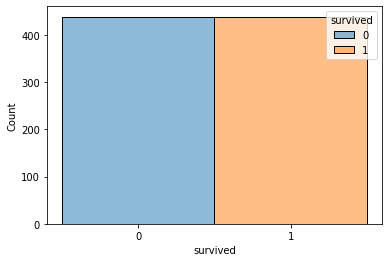

In [ ]:
smote_data = pd.DataFrame()
smote_data['survived'] = y_smote.flatten()
h = sns.histplot(smote_data, x='survived', hue='survived', bins=2, discrete=True)
h.set_xticks(range(2))
plt.show()

Now the true and false target data are equally represented, both containing 439 entries.

In [ ]:
# set random seed to be able to reproduce results
np.random.seed(42)
# create model
smote_model = Logistic_Regression()
# run cross-validation
validation_loss, train_losses, probabilities = cross_validate(smote_model, x_smote, x_test, y_smote, y_test, 5000, 0.01)

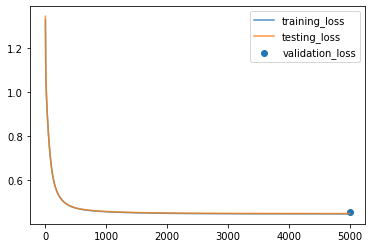

In [ ]:
# plot training and testing losses and validation loss
train_losses = np.array(train_losses)
plt.plot(train_losses[:,0], alpha=0.8, label='training_loss')
plt.plot(train_losses[:,1], alpha=0.8, label='testing_loss')
plt.scatter(x=5000, y=validation_loss, label='validation_loss')
plt.legend()
plt.show()

<AxesSubplot:xlabel='probability', ylabel='Density'>

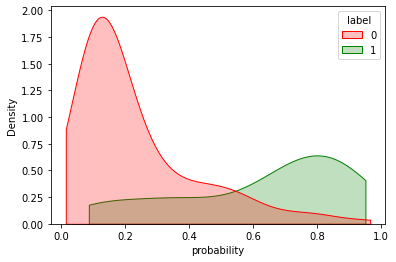

In [ ]:
df = pd.DataFrame()
df['probability'] = model.predict_probabilities(x_test).flatten()
df['label'] = y_test.flatten()
sns.kdeplot(data=df, x='probability', hue='label', palette=['red','green'], fill=True, cut=0)

In [ ]:
smote_report = classification_report(smote_model, x_test, y_test)
smote_report

,threshold,AUC,J-stat,accuracy,recall,precision,neg_precision,specificity,f_score,r-squared,p-value
0,0.40,0.8603,0.5941,0.7978,0.7941,0.7105,0.8627,0.8000,0.7500,0.3156,2.595032e-13
1,0.50,0.8603,0.5864,0.8034,0.7500,0.7391,0.8440,0.8364,0.7445,0.3156,2.595032e-13
2,0.32,0.8603,0.5858,0.7753,0.8676,0.6556,0.8977,0.7182,0.7468,0.3156,2.595032e-13
3,0.31,0.8603,0.5858,0.7753,0.8676,0.6556,0.8977,0.7182,0.7468,0.3156,2.595032e-13
4,0.39,0.8603,0.5850,0.7921,0.7941,0.7013,0.8614,0.7909,0.7448,0.3156,2.595032e-13


The smote model was able to detect more true positives (recall ~ +0.015), but at the expense of false positives (precision ~ -0.1) and accuracy (~-0.02). This is the trade-off when using SMOTE. If the goal of the model is to detect as many minority cases as possible (survivors) then SMOTE would be of use to you. It depends on the purpose of the model (what you are trying to maximize/minimize).   

For a more thorough exploration and complete analysis, we'll write out a function that will enable us to test multiple models using a variety of learning rates and k-neighbors (if using SMOTE data). 

In [ ]:
def test(x_train, x_test, y_train, y_test, iterations, learning_rates, k_neighbors):

    # create dataframe to store results
    results=pd.DataFrame()

    for lr in learning_rates:
        # create model
        model = Logistic_Regression()
        # set random seed to be able to ensure same starting theta values and reproduce results  
        np.random.seed(42)
        # run cross-validation
        validation_loss, train_losses, probabilities = cross_validate(model, x_train, x_test, y_train, y_test, iterations, lr)
        #run classification report on model
        model_report = classification_report(model, x_test, y_test)
        # add binary CE
        model_report['Binary CE'] = np.round(validation_loss,4)
        # add learning rate
        model_report['learning rate'] = lr
        # add N/A for k-neighbors since data not augmented
        model_report['k-neighbors'] = 'N/A'
        # concatenate model_report to bottom of results dataframe
        results = pd.concat([results,model_report]) 

        # run learning rate on augmented data using every k-neighbor value
        for kn in k_neighbors:
            # run model on augmented data using smote
            x_smote, y_smote = smote_nc(x_train, y_train, [5,6,7], kn)
            # turn y_smote into column vector (Nx1)
            y_smote = y_smote.reshape((-1,1))

            # create model
            smote_model = Logistic_Regression()
            # set random seed to be able to ensure same starting theta values and reproduce results  
            np.random.seed(42)
            # run cross-validation
            validation_loss, train_losses, probabilities = cross_validate(smote_model, x_smote, x_test, y_smote, y_test, iterations, lr)
            # run classification report
            smote_report = classification_report(smote_model, x_test, y_test)
            # add binary CE
            smote_report['Binary CE'] = np.round(validation_loss,4)
            # add learning rate
            smote_report['learning rate'] = lr
            # add k-neighbors
            smote_report['k-neighbors'] = kn
            # concatenate model_report to bottom of results dataframe
            results = pd.concat([results,smote_report]) 

    # move binary CE, learning rate, k-neighbors columns to front of dataframe
    col = results.pop('k-neighbors')
    results.insert(0, col.name, col)
    col = results.pop('learning rate')
    results.insert(0, col.name, col)
    col = results.pop('Binary CE')
    results.insert(0, col.name, col)

    return results

In [ ]:
learning_rates = [0.1, 0.05, 0.01]
k_neighbors = [1,2,3,4,5,6,7,8,9,10]
results = test(x_train, x_test, y_train, y_test, 10000, learning_rates, k_neighbors)

In [ ]:
results

,Binary CE,learning rate,k-neighbors,threshold,AUC,J-stat,accuracy,recall,precision,neg_precision,specificity,f_score,r-squared,p-value
0,0.4396,0.10,N/A,0.59,0.8610,0.6128,0.8371,0.6765,0.8679,0.8240,0.9364,0.7603,0.3389,2.022812e-14
1,0.4396,0.10,N/A,0.58,0.8610,0.6037,0.8315,0.6765,0.8519,0.8226,0.9273,0.7541,0.3389,2.022812e-14
2,0.4396,0.10,N/A,0.32,0.8610,0.6019,0.7921,0.8382,0.6867,0.8842,0.7636,0.7550,0.3389,2.022812e-14
3,0.4396,0.10,N/A,0.34,0.8610,0.5997,0.7978,0.8088,0.7051,0.8700,0.7909,0.7534,0.3389,2.022812e-14
4,0.4396,0.10,N/A,0.33,0.8610,0.5997,0.7978,0.8088,0.7051,0.8700,0.7909,0.7534,0.3389,2.022812e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.4549,0.01,10,0.44,0.8611,0.6032,0.8034,0.7941,0.7200,0.8641,0.8091,0.7552,0.3160,2.474534e-13
1,0.4549,0.01,10,0.34,0.8611,0.5949,0.7809,0.8676,0.6629,0.8989,0.7273,0.7516,0.3160,2.474534e-13
2,0.4549,0.01,10,0.55,0.8611,0.5898,0.8090,0.7353,0.7576,0.8393,0.8545,0.7463,0.3160,2.474534e-13
3,0.4549,0.01,10,0.35,0.8611,0.5893,0.7809,0.8529,0.6667,0.8901,0.7364,0.7484,0.3160,2.474534e-13


The chart above confirms that augmenting the data does increase the recall but at the expense of accuracy and precision. It's also interesting to note that the highest r-squared values are from models trained on data that wasn't augmented, proving that augmented data does introduce noise, and the noise is proportional to the number of neighbors being used (more neighbors = less noise). Again, the model chosen depends on its purpose. If accuracy and precision (limiting false positives) are most important, unaugmented data at the 0.59 (59%) threshold looks to be the sweet spot (at any learning rate. Lower learning rates require more iterations to step to a minimum but can find lower minimums than higher learning rates). On the other hand, if identifying true positives is the most important (recall), an augmented dataset using 7 neighbors trained at a 0.1 learning rate with a classification threshold of 35% or 34% looks to be the best choice.

What if we need to classify something with more than two outcomes? Instead of a true/false, what if we need to classify categories (numbers/animals/etc...). This is known as Multiclass (or Multinomial) Regression and will be the subject of the next post.